In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

plt.rcParams["figure.figsize"] = (5,3)

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_excel('EnergyCallCentre.xlsx')
df.shape

(504, 9)

In [16]:
df.head()

,Month,VHT,ToD,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
0,Oct-Nov,Off,morning,19,113,0,113,0.00,4.9
1,Oct-Nov,On,afternoon,29,146,0,146,0.00,5.8
2,Oct-Nov,On,evening,5,37,0,37,0.00,4.2
3,Oct-Nov,Off,morning,26,163,0,163,0.13,5.0
4,Oct-Nov,Off,afternoon,21,118,0,118,0.00,5.1


In [17]:
df1 = df.sample(100)

In [18]:
df1 = df1.reset_index().drop(['index'], axis=1)

In [19]:
df1.head()

,Month,VHT,ToD,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
0,Feb-Mar,Off,evening,9,57,1,56,0.10,4.9
1,Feb-Mar,Off,afternoon,3,23,0,23,0.00,4.0
2,Dec-Jan,Off,evening,8,58,0,58,0.05,4.6
3,Oct-Nov,On,evening,11,74,1,73,0.38,4.5
4,Oct-Nov,Off,evening,11,67,1,66,0.17,5.0


In [63]:
df1.describe()

,Agents,CallsOffered,CallsAbandoned,CallsHandled,ASA,Avehandletime
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,20.530000,129.48000,4.180000,125.300000,0.92500,5.028000
std,11.435771,70.19705,9.400602,66.846047,1.98736,0.596637
min,3.000000,23.00000,0.000000,23.000000,0.00000,2.800000
25%,10.000000,58.75000,0.000000,58.000000,0.00000,4.800000
50%,21.000000,141.00000,0.000000,141.000000,0.10000,5.000000
75%,29.250000,186.25000,2.250000,183.500000,0.74750,5.400000
max,49.000000,297.00000,49.000000,279.000000,10.28000,6.300000


Off    55
On     45
Name: VHT, dtype: int64


<AxesSubplot:xlabel='VHT', ylabel='count'>

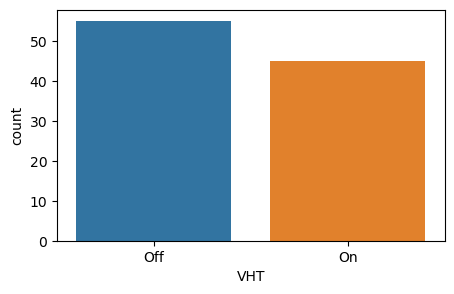

In [40]:
print(df1['VHT'].value_counts())

sns.countplot(x='VHT', data=df1)

Out of 100 hours sample data.\
Mostly Data is from OFF VHT.

afternoon    37
evening      35
morning      28
Name: ToD, dtype: int64


<AxesSubplot:xlabel='ToD', ylabel='count'>

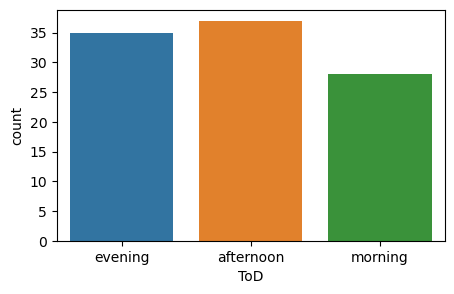

In [41]:
print(df1['ToD'].value_counts())

sns.countplot(x='ToD', data=df1)

Mostly data is from 'Afternoon' calls.

<AxesSubplot:xlabel='Agents', ylabel='Count'>

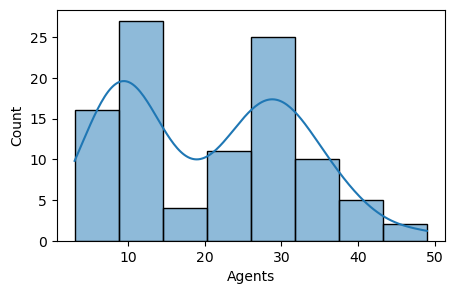

In [46]:
sns.histplot(x='Agents', data=df1, kde=True)

This shows the distribution of Agents in these 100 hours sample data.\
We can see that mostly agents are from 10-15 and 25-35 range.

<AxesSubplot:xlabel='CallsOffered', ylabel='Count'>

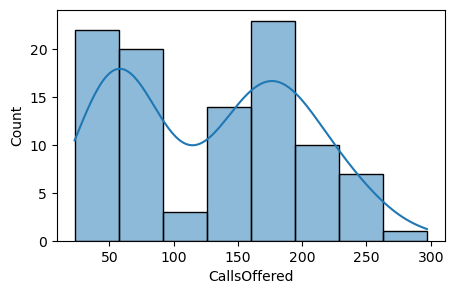

In [47]:
sns.histplot(x='CallsOffered', data=df1, kde=True)

This shows the distribution of Calls Offered.\
Mostly callsOffered are from 50-100 and 150-200 range.

<AxesSubplot:xlabel='CallsAbandoned'>

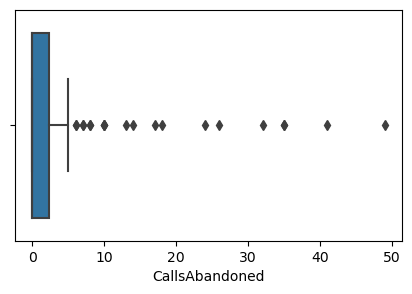

In [51]:
sns.boxplot(x='CallsAbandoned', data=df1)

This shows the boxplot of CallsAbandoned.\
Mostly calls Abandoned are 0-5.

<AxesSubplot:xlabel='CallsHandled', ylabel='Count'>

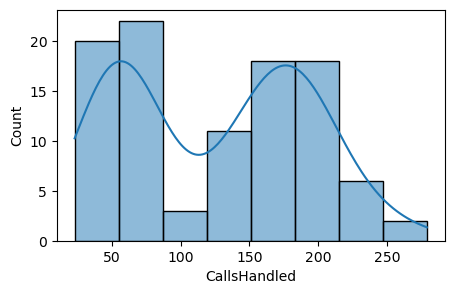

In [53]:
sns.histplot(x='CallsHandled', data=df1, kde=True1)

This shows the distribution of Calls Handled.\
This matches the pattern of Calls Offered. \
Mostly calls handled are from 0-100 and 150-230 range.

<AxesSubplot:xlabel='ASA'>

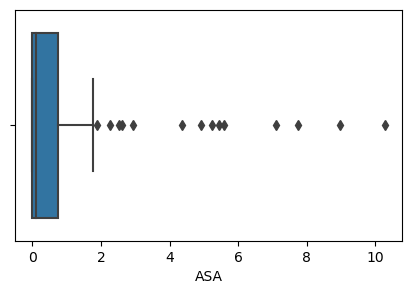

In [56]:
sns.boxplot(x='ASA', data=df1)

This shows the boxplot of ASA (Average Speed of Answer).\
Mostly ASA is under 1 minute. 

<AxesSubplot:xlabel='Avehandletime', ylabel='Count'>

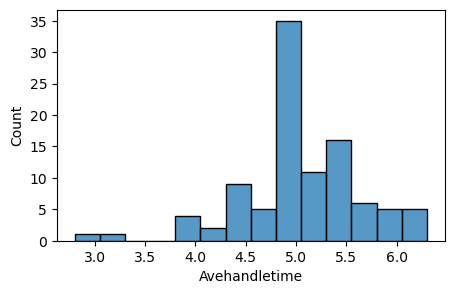

In [58]:
sns.histplot(x='Avehandletime', data=df1)

This shows the distribution of Average Handle Time.\
Mostly Handle time is 5 minutes.

## Bi-Variate Analysis

<AxesSubplot:xlabel='VHT', ylabel='count'>

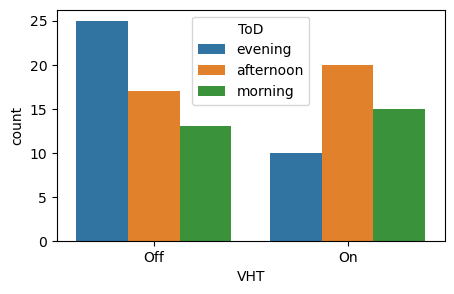

In [77]:
sns.countplot(x='VHT', hue='ToD', data=df1)

So we can see that when VHT is Off, Mostly calls are from Evening.\
and when the VHT is On, Mostly calls are from Afternoon

<AxesSubplot:xlabel='VHT'>

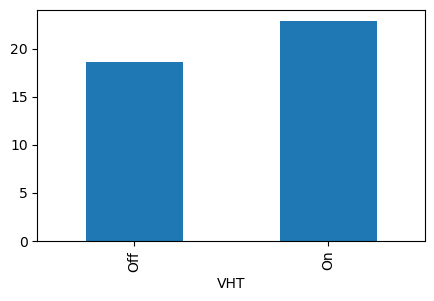

In [80]:
df1.groupby(['VHT'])['Agents'].mean().plot(kind='bar')

This shows that when VHT is On, There are mostly Agent working.

<AxesSubplot:xlabel='VHT'>

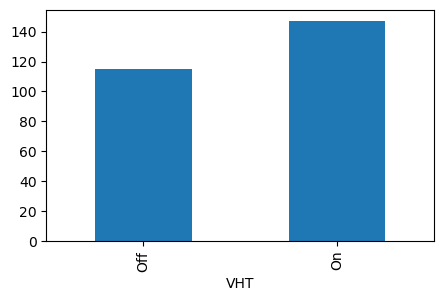

In [82]:
df1.groupby(['VHT'])['CallsOffered'].mean().plot(kind='bar')

This shows that when VHT is On, most of the Calls were offered to the Agents.

<AxesSubplot:xlabel='VHT'>

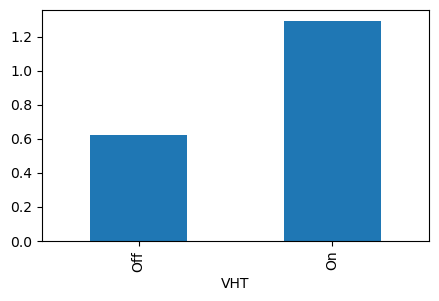

In [85]:
df1.groupby(['VHT'])['ASA'].mean().plot(kind='bar')

This shows that when VHT is On, ASA(Average Speed of Answer) is high

<AxesSubplot:xlabel='VHT'>

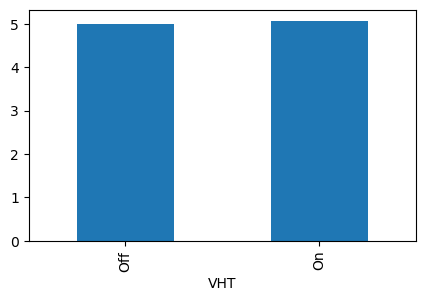

In [86]:
df1.groupby(['VHT'])['Avehandletime'].mean().plot(kind='bar')

This shows that whether VHT is On or Off. The Average Handle Time is equal in both the cases and that is around 5 minutes.

## Correlation among all the attributes

In [72]:
df1['VHT num'] = df1['VHT'].map({'Off':0, 'On':1})

<AxesSubplot:>

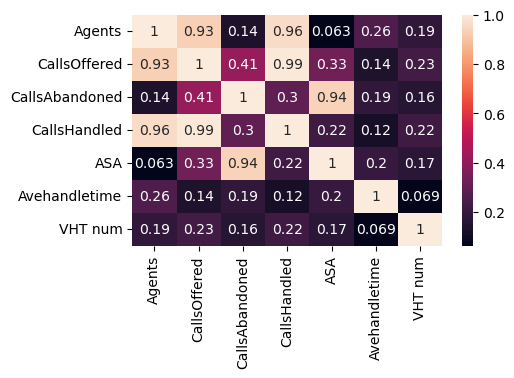

In [75]:
sns.heatmap(df1.corr(), annot=True)

## The Main Analysis Question:
Is there any evidence that this reduces the chance that callers abandon their call?

<AxesSubplot:xlabel='VHT'>

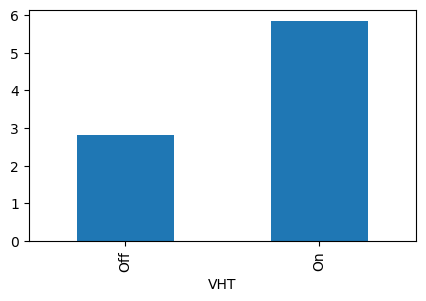

In [39]:
df1.groupby(['VHT'])['CallsAbandoned'].mean()

df1.groupby(['VHT'])['CallsAbandoned'].mean().plot(kind='bar')

This shows the CallsAbandoned mean rate when the VHT is Off and On.\
We can see that when VHT is On. Most of the calls Abandoned.\
This seems that most of the callers abandon their calls when the VHT is On.\


The Impact of VHT in last Summer:

So during this analysis we can see that in last winter most of the calls abandon their calls when the VHT was ON.\
so there was no benefit from this VHT (Virtual Hold Technology).\
we can see that the ratio of Calls abandoned is very high when VHT is ON as compared to when the VHT was OFF.